## Connectionist Computing Assignmnet
## BingBing Li

In [1]:
import numpy as np
import pandas as pd
import random

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Fri May 15 00:30:16 2020

@author: dell
"""

# -*- coding: utf-8 -*-
"""
Created on Fri May 15 00:25:18 2020

@author: dell
"""

import numpy as np
import pandas as pd
import random

class MLP(object):
    def __init__(self, NI, NH, NO):   #     initialise the attributes
        self.no_in = NI               #     NI number of input
        self.no_hidden = NH           #     NH number of Hiddlen units
        self.no_out = NO              #     NO number of output
        self.W1 = np.array        #     An matrix containing the weights in the lower layer
        self.W2 = np.array        #     An matrix containing the weights in the upper layer
        self.dW1 = np.array       #     An matrix containing the weights change to be applied on w1 in the lower layer
        self.dW2 = np.array       #     An matrix containing the weights change to be applied on w2 in the upper layer
        self.Z1 = np.array        #     An array containing the activations in the lower layer
        self.Z2 = np.array        #     An array containing the activations in the upper layer
        self.bias1 = np.array       #     Bias for the lower layer
        self.bias2 = np.array       #     Bias for the upper layer
        self.dBias1 = np.array    #     An matrix containing the bias change to be applied on w1 in the upper layer
        self.dBias2 = np.array    #     An matrix containing the bias change to be applied on w2 in the upper layer
        self.H = np.array  #  array where the values of the hidden neurons are stored – need these saved to compute dW2)
        self.O = np.array  #  array where the outputs are stored   
        
        
    #  Initialize matrix W1 and W2 randomly from Normal distribution having mean 0 and variance 1     
    def randomise(self): 
        self.W1 = np.array((np.random.uniform(low=0, high=1, size=(self.no_in, self.no_hidden))).tolist())
        self.W2 = np.array((np.random.uniform(low=0, high=1, size=(self.no_hidden, self.no_out))).tolist())
        

        # set dW1 and dW2 to all zeroes.
        self.dW1 = np.dot(self.W1, 0)
        self.dW2 = np.dot(self.W2, 0)
        
        
    def sigmoid(self, sigInput):
    # Define a logistic sigmoid function which takes input sigInput and returns 1/(1 + math.exp(-sigInput)).
        return 1 / (1 + np.exp(-sigInput))
    def derivative_sigmoid(self, sigInput):
        # return sigmoid(sigInput) * (1 - sigmoid(sigInput))
        return np.exp(-sigInput) / (1 + np.exp(-sigInput)) ** 2
    
    # Define a logistic tanH function which takes input sigInput and returns 2 / (1 + np.exp(-2*tangInput))-1.
    def tanh(self, tangInput):
        return (np.exp(tangInput)-np.exp(-tangInput))/(np.exp(tangInput)+np.exp(-tangInput))
    def derivative_tanH(self, tangInput):
        return 1-self.tanh(tangInput) ** 2
        
        
        
      # Forward pass. Input vector I is processed to produce an output, which is stored in O[].
    def forward(self, I, activation):
    # If we use sigmoid activation function, take the inputs, and put them through the formula to get lower neuron's output
        if activation == 'sigmoid':
            # Array containing the activations in the lower layer
            self.Z1 = np.dot(I, self.W1)
            # Array where the values of the hidden neurons are stored 
            self.H = self.sigmoid(self.Z1)
            
            # Take lower layer's outputs, and put them through the formula to get upper neuron's output
            self.Z2 = np.dot(self.H, self.W2)
            # Array where the outputs are stored
            self.O = self.sigmoid(self.Z2)
    
        elif activation == 'tanh' :
            self.Z1 = np.dot(I, self.W1) 
            # Array where the values of the hidden neurons are stored 
            self.H = self.tanh(self.Z1)
            # If we use tanh activation function,, take lower layer's outputs, and put them through the formula to get upper neuron's output
            self.Z2 = np.dot(self.H, self.W2)
            # Array where the outputs are stored       
            self.O = self.tanh(self.Z2)
#             print("tanhforward is" + self.O)
        return self.O
    
    
    #  backward pass 
    #  target is the output that we want, self.O is the output predicted by our network
    def backward(self, I, target, activation):
        output_error = np.subtract(target, self.O) #difference (error) in output 
        if activation == 'sigmoid' : 
            activation_O=self.derivative_sigmoid(self.Z2)
            activation_H=self.derivative_sigmoid(self.Z1)
        elif activation == 'tanh' :
            activation_O=self.derivative_tanH(self.Z2)
            activation_H=self.derivative_tanH(self.Z1)
        dw2_a = np.multiply(output_error, activation_O)
        self.dW2 = np.dot(self.H.T, dw2_a)
        dw1_a=np.multiply(np.dot(dw2_a, self.W2.T), activation_H)
        self.dW1=np.dot(I.T,dw1_a)
        return np.mean(np.abs(output_error))


    # Adjust the weights
    def updateWeights(self, learningRate):
        self.W1 = np.add(self.W1,learningRate * self.dW1)
        self.W2 = np.add(self.W2,learningRate * self.dW2)
        self.dW1 = np.array
        self.dW2 = np.array





In [3]:
#XOR Test

log = open("xortest.txt", "w")
print("XOR TEST\n", file = log)


def XOR(max_epochs, learning_rate):
    np.random.seed(1)
    inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    outputs = np.array([[0], [1], [1], [0]])

    NI = 2
    NH = 4
    NO = 1
    NN = MLP(NI, NH, NO)

    NN.randomise()
    print('\nMax Epoch:\n' + str(max_epochs), file=log)
    print('\nLearning Rate:\n' + str(learning_rate), file=log)
    print('\nBefore Training:\n', file=log)
    for i in range(len(inputs)):
        NN.forward(inputs[i],'sigmoid')
        print('Target:\t {}  Output:\t {}'.format(str(outputs[i]), str(NN.O)), file=log)
    print('\nTraining:\n', file=log)

    for i in range(0, max_epochs):
        NN.forward(inputs,'sigmoid')
        error = NN.backward(inputs, outputs,'sigmoid')
        NN.updateWeights(learning_rate)

        if (i + 1) % (max_epochs / 20) == 0:
            print(' Error at Epoch:\t' + str(i + 1) + '\t\t  is \t\t' + str(error), file=log)

    print('\n After Training :\n', file=log)
    
    accuracy = float(0)
    for i in range(len(inputs)):
        NN.forward(inputs[i],'sigmoid')
        print('Target:\t {}  Output:\t {}'.format(str(outputs[i]), str(NN.O)), file=log)
        if(outputs[i][0]==0):
            accuracy+=1-NN.O[0]
        elif(outputs[i][0]==1):
            accuracy+=NN.O[0] 
    print('\nAccuracy: {}'.format(accuracy/4),file=log)
    accuracylist.append(accuracy/4)
    


Epoch=[100, 1000, 10000, 100000, 1000000]
learn_rate=[1.0,0.75,0.5,0.25,0.1,0.05]
accuracylist=[]
for i in range(len(Epoch)):
    for j in range(len(learn_rate)):
        print('----------------------------------------------------------------------\n', file=log)
        XOR(Epoch[i],learn_rate[j])
        print('\n-------------------------------------------------------------------\n', file=log)
print(accuracylist)

[0.5000301241417046, 0.5000257962180499, 0.5000218483916486, 0.5000182652345351, 0.5000277400585359, 0.5000834280234948, 0.8432198111278989, 0.6176600547347811, 0.5016162553659848, 0.5000844547092941, 0.5000312279781671, 0.5000221563744891, 0.9834361230417975, 0.9795257182911123, 0.9725544467946178, 0.9539990702695194, 0.8474482253148723, 0.5017664995645079, 0.9955187768061668, 0.994835378478497, 0.9936659003836418, 0.990808989894758, 0.9833188307874235, 0.9725072594000221, 0.998549007792356, 0.9983293137328064, 0.9979629680768267, 0.9971438254342546, 0.9955297090628872, 0.9936726970229244]


In [4]:
import matplotlib.pyplot as plt

In [15]:
len(accuracylist)

30

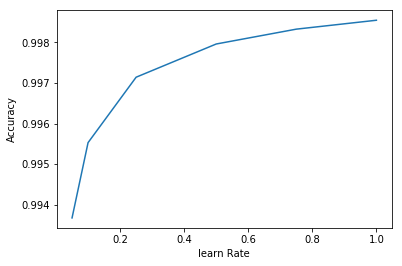

In [18]:
plt.plot(learn_rate,accuracylist[24:30])
plt.xlabel('learn Rate')
plt.ylabel('Accuracy')
plt.show()
# when epoch is 1000000

In [22]:
Epoch

[100, 1000, 10000, 100000, 1000000]

In [3]:
#XOR Test

log = open("xortest.txt", "w")
print("XOR TEST\n", file = log)


def XOR(max_epochs, learning_rate):
    np.random.seed(1)
    inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    outputs = np.array([[0], [1], [1], [0]])

    NI = 2
    NH = 4
    NO = 1
    NN = MLP(NI, NH, NO)

    NN.randomise()
    print('\nMax Epoch:\n' + str(max_epochs), file=log)
    print('\nLearning Rate:\n' + str(learning_rate), file=log)
    print('\nBefore Training:\n', file=log)
    for i in range(len(inputs)):
        NN.forward(inputs[i],'sigmoid')
        print('Target:\t {}  Output:\t {}'.format(str(outputs[i]), str(NN.O)), file=log)
    print('\nTraining:\n', file=log)

    for i in range(0, max_epochs):
        NN.forward(inputs,'sigmoid')
        error = NN.backward(inputs, outputs,'sigmoid')
        NN.updateWeights(learning_rate)

        if (i + 1) % (max_epochs / 20) == 0:
            print(' Error at Epoch:\t' + str(i + 1) + '\t\t  is \t\t' + str(error), file=log)

    print('\n After Training :\n', file=log)
    
    accuracy = float(0)
    for i in range(len(inputs)):
        NN.forward(inputs[i],'sigmoid')
        print('Target:\t {}  Output:\t {}'.format(str(outputs[i]), str(NN.O)), file=log)
        if(outputs[i][0]==0):
            accuracy+=1-NN.O[0]
        elif(outputs[i][0]==1):
            accuracy+=NN.O[0] 
    print('\nAccuracy: {}'.format(accuracy/4),file=log)
    accuracylist.append(accuracy/4)
    


Epoch=[100, 1000, 10000, 100000, 1000000]
learn_rate=[1.0,0.75,0.5,0.25,0.1,0.05]
accuracylist=[]
for i in range(len(Epoch)):
    for j in range(len(learn_rate)):
        print('----------------------------------------------------------------------\n', file=log)
        XOR(Epoch[i],learn_rate[j])
        print('\n-------------------------------------------------------------------\n', file=log)
print(accuracylist)

[0.5000301241417046, 0.5000257962180499, 0.5000218483916486, 0.5000182652345351, 0.5000277400585359, 0.5000834280234948, 0.8432198111278989, 0.6176600547347811, 0.5016162553659848, 0.5000844547092941, 0.5000312279781671, 0.5000221563744891, 0.9834361230417975, 0.9795257182911123, 0.9725544467946178, 0.9539990702695194, 0.8474482253148723, 0.5017664995645079, 0.9955187768061668, 0.994835378478497, 0.9936659003836418, 0.990808989894758, 0.9833188307874235, 0.9725072594000221, 0.998549007792356, 0.9983293137328064, 0.9979629680768267, 0.9971438254342546, 0.9955297090628872, 0.9936726970229244]


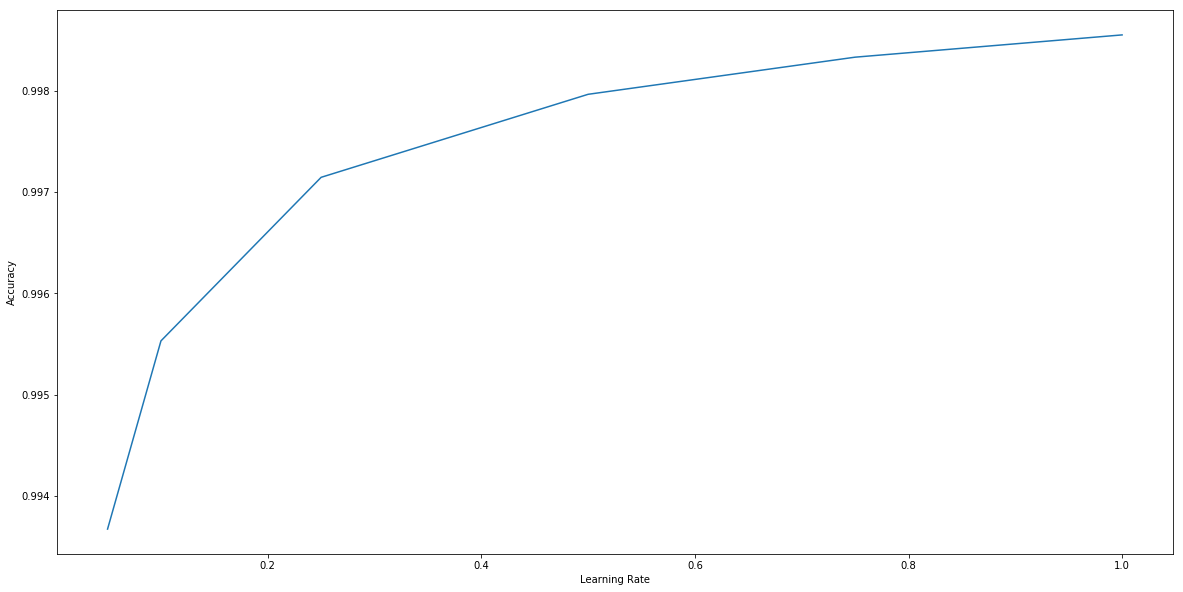

In [42]:
import matplotlib. pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(learn_rate,accuracylist[24:30])

#when leaning rate is 1
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.show()

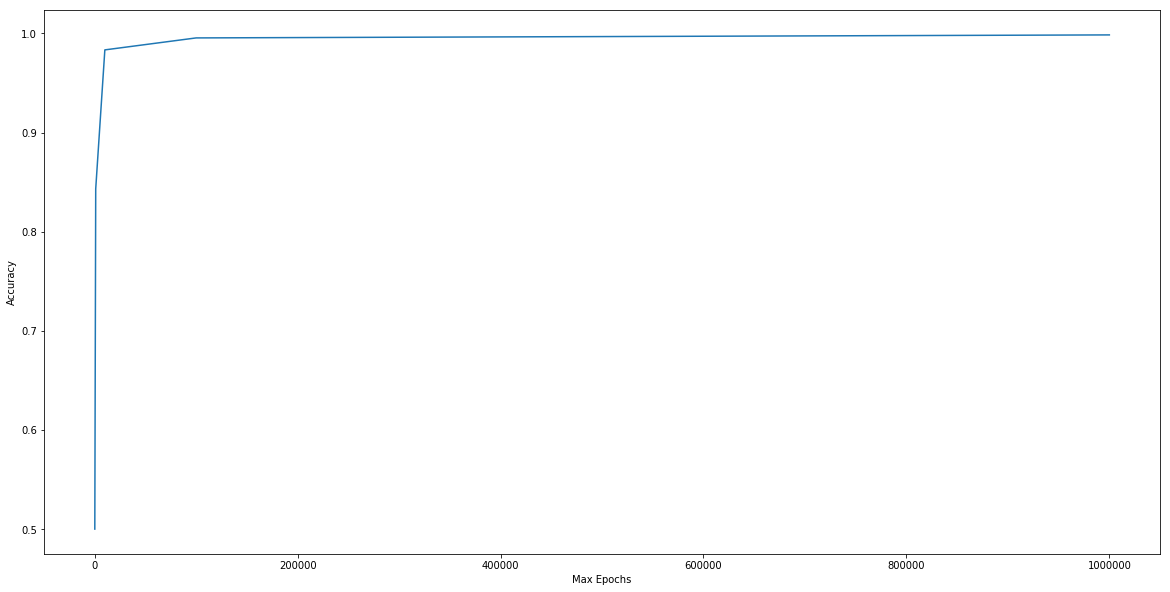

In [36]:
newlist =[0.5,0.8432198111278989,0.9834361230417975,0.9955187768061668,0.998549007792356]
plt.figure(figsize=(20,10))
plt.plot(Epoch,newlist)

#when leaning rate is 1
plt.xlabel('Max Epochs')
plt.ylabel('Accuracy')
plt.show()